In [5]:
# ==============================
# 1️⃣ IMPORT LIBRARIES
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# ==============================
# 2️⃣ LOAD JSONL FILE
# ==============================

file_path = r"C:/Users/mohit/OneDrive/Desktop/FRESH START/DegreeFYD Assignment/degreefyd_data.jsonl"

try:
    df = pd.read_json(file_path, lines=True)
    print("✅ File Loaded Successfully\n")
except Exception as e:
    print("❌ Error loading file:", e)

# ==============================
# 3️⃣ BASIC DATA OVERVIEW
# ==============================

print("🔹 First 5 Rows")
print(df.head(), "\n")

print("🔹 Dataset Shape")
print(df.shape, "\n")

print("🔹 Column Names")
print(df.columns, "\n")

print("🔹 Data Info")
print(df.info(), "\n")

# ==============================
# 4️⃣ MISSING VALUES
# ==============================

print("🔹 Missing Values Count")
print(df.isnull().sum(), "\n")

missing_percent = (df.isnull().sum() / len(df)) * 100
print("🔹 Missing Values Percentage")
print(missing_percent, "\n")

# ==============================
# 5️⃣ DUPLICATES
# ==============================

duplicate_count = df.duplicated().sum()
print(f"🔹 Number of Duplicate Rows: {duplicate_count}\n")

# ==============================
# 6️⃣ NUMERICAL SUMMARY
# ==============================

print("🔹 Numerical Summary Statistics")
print(df.describe(), "\n")

# ==============================
# 7️⃣ CATEGORICAL SUMMARY
# ==============================

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n🔹 Value Counts for {col}")
    print(df[col].value_counts().head())




✅ File Loaded Successfully

🔹 First 5 Rows
                                                 url        type  \
0  https://degreefyd.com/comparison/periyar-unive...  comparison   
1  https://degreefyd.com/comparison/k-j-somaiya-i...  comparison   
2  https://degreefyd.com/comparison/ganpat-univer...  comparison   
3  https://degreefyd.com/comparison/jecrc-univers...  comparison   
4  https://degreefyd.com/comparison/hnbgu-hemvati...     college   

                                             content  
0  Periyar University Online vs Indira Gandhi Nat...  
1  K J Somaiya Institute of Management Online vs ...  
2  Ganpat University – Distance Learning vs IIM I...  
3  JECRC University Online vs Dr. Babasaheb Ambed...  
4  HNBG University Distance Education vs Khalsa C...   

🔹 Dataset Shape
(14810, 3) 

🔹 Column Names
Index(['url', 'type', 'content'], dtype='object') 

🔹 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14810 entries, 0 to 14809
Data columns (total 3 columns):


In [6]:
df

,url,type,content
0,https://degreefyd.com/comparison/periyar-unive...,comparison,Periyar University Online vs Indira Gandhi Nat...
1,https://degreefyd.com/comparison/k-j-somaiya-i...,comparison,K J Somaiya Institute of Management Online vs ...
2,https://degreefyd.com/comparison/ganpat-univer...,comparison,Ganpat University – Distance Learning vs IIM I...
3,https://degreefyd.com/comparison/jecrc-univers...,comparison,JECRC University Online vs Dr. Babasaheb Ambed...
4,https://degreefyd.com/comparison/hnbgu-hemvati...,college,HNBG University Distance Education vs Khalsa C...
...,...,...,...
14805,https://degreefyd.com/comparison/lovely-profes...,comparison,Lovely Professional University Online vs CGC J...
14806,https://degreefyd.com/comparison/amity-univers...,comparison,Amity University Mohali vs Plaksha University ...
14807,https://degreefyd.com/comparison/amritsar-grou...,college,Amritsar Group of Colleges vs Venkateshwara Op...
14808,https://degreefyd.com/comparison/amity-univers...,comparison,Amity University Online Courses & Admission 20...


In [7]:
df['type'].value_counts()

type
comparison    12559
college        1903
blog            161
exam            141
course           34
page             12
Name: count, dtype: int64

In [8]:

# ── IIT EDA ──────────────────────────────────────────────────────────────────
# Filter all rows that mention IIT in the content or URL
iit_mask = (
    df['content'].str.contains(r'\bIIT\b', case=False, na=False) |
    df['url'].str.contains(r'\biit\b', case=False, na=False)
)
iit_df = df[iit_mask].copy()

print(f"Total rows          : {len(df)}")
print(f"IIT-related rows    : {len(iit_df)}  ({100*len(iit_df)/len(df):.1f}% of dataset)")
print()
print("IIT rows by doc type:")
print(iit_df['type'].value_counts())


Total rows          : 14810
IIT-related rows    : 366  (2.5% of dataset)

IIT rows by doc type:
type
comparison    315
college        29
exam           18
blog            3
course          1
Name: count, dtype: int64


In [9]:

# ── Which specific IITs appear and how often ─────────────────────────────────
import re

iit_names = [
    'IIT Bombay', 'IIT Delhi', 'IIT Madras', 'IIT Kanpur', 'IIT Kharagpur',
    'IIT Roorkee', 'IIT Guwahati', 'IIT Hyderabad', 'IIT BHU', 'IIT Varanasi',
    'IIT Indore', 'IIT Jodhpur', 'IIT Mandi', 'IIT Patna', 'IIT Ropar',
    'IIT Bhubaneswar', 'IIT Gandhinagar', 'IIT Tirupati', 'IIT Palakkad',
    'IIT Dhanbad', 'IIT (ISM)', 'IIT Jammu', 'IIT Dharwad', 'IIT Bhilai',
    'IIT Goa', 'IIT Jodhpur'
]

iit_counts = {}
for name in iit_names:
    count = df['content'].str.contains(re.escape(name), case=False, na=False).sum()
    if count > 0:
        iit_counts[name] = count

iit_series = pd.Series(iit_counts).sort_values(ascending=False)
print("IIT mention counts across all documents:")
print(iit_series.to_string())


IIT mention counts across all documents:
IIT Ropar        338
IIT Roorkee       11
IIT Bombay        10
IIT Guwahati      10
IIT Delhi          9
IIT Madras         5
IIT Kanpur         5
IIT Kharagpur      5
IIT Hyderabad      4
IIT Indore         2
IIT BHU            1
IIT Mandi          1


# Part 2 — SQLite Database EDA (`degreefyd.db`)

The database contains **4 tables**:
| Table | Rows | Description |
|---|---|---|
| `colleges` | 308 | College metadata (name, location, type, NIRF rank, rating, fees…) |
| `comparisons` | 12 402 | Side-by-side college comparison pages |
| `exams` | 141 | Entrance exam schedule & metadata |
| `blogs` | 161 | Blog posts with author, date, college mentioned |

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='muted')

DB_PATH = r'../data/degreefyd.db'
conn = sqlite3.connect(DB_PATH)

# ── Load all tables ───────────────────────────────────────────────────────────
colleges    = pd.read_sql_query("SELECT * FROM colleges",    conn)
comparisons = pd.read_sql_query("SELECT * FROM comparisons", conn)
exams       = pd.read_sql_query("SELECT * FROM exams",       conn)
blogs       = pd.read_sql_query("SELECT * FROM blogs",       conn)

print("Table sizes:")
for name, df in [('colleges', colleges), ('comparisons', comparisons),
                 ('exams', exams), ('blogs', blogs)]:
    print(f"  {name:15s}: {df.shape[0]:>6,} rows × {df.shape[1]} cols")

Table sizes:
  colleges       :    308 rows × 11 cols
  comparisons    : 12,402 rows × 20 cols
  exams          :    141 rows × 12 cols
  blogs          :    161 rows × 7 cols


## 1. Colleges Table EDA

In [11]:
# ── Basic info ────────────────────────────────────────────────────────────────
print("Shape:", colleges.shape)
print("\nDtypes:\n", colleges.dtypes.to_string())
print("\nMissing values:\n", colleges.isnull().sum().to_string())
colleges.head()

Shape: (308, 11)

Dtypes:
 id                    int64
name                 object
location             object
college_type         object
established_year    float64
nirf_rank           float64
rating              float64
total_students      float64
courses_offered     float64
fee_range            object
url                  object

Missing values:
 id                    0
name                  0
location            132
college_type        133
established_year    129
nirf_rank           140
rating              140
total_students      164
courses_offered     137
fee_range           138
url                 308


,id,name,location,college_type,established_year,nirf_rank,rating,total_students,courses_offered,fee_range,url
0,1,Periyar University Online,to make an informed decision using this compre...,Private,1997.0,56.0,4.5,65000.0,6.0,41,None
1,2,IGNOU,"IGNOU New Delhi, Delhi",Private,1985.0,1.0,4.0,3093583.0,285.0,"1,000 - 64,000",None
2,3,KJ Somaiya Online,to make an informed decision using this compre...,Private,1981.0,63.0,4.4,NaN,7.0,2,None
3,4,Jammu University Distance Education,"Kings Group of Institutions Barnala,Punjab",Private,1976.0,50.0,3.9,11200.0,13.0,"7,335 - 21,285",None
4,5,Ganpat University Distance Learning,to make an informed decision using this compre...,Private,2005.0,101.0,4.1,8500.0,1.0,2,None


In [12]:
# ── Descriptive statistics for numeric columns ────────────────────────────────
colleges[['nirf_rank', 'rating', 'total_students', 'courses_offered', 'established_year']].describe().round(2)

,nirf_rank,rating,total_students,courses_offered,established_year
count,168.00,168.00,144.00,171.00,179.00
mean,59.91,4.14,86027.14,50.89,1990.09
std,89.43,0.35,294762.68,158.37,27.54
min,1.00,2.80,1.00,1.00,1882.00
25%,6.00,3.98,3575.00,11.00,1981.00
50%,45.50,4.20,12165.50,22.00,2001.00
75%,87.00,4.40,40600.75,48.00,2009.00
max,1001.00,4.75,3093583.00,2016.00,2021.00


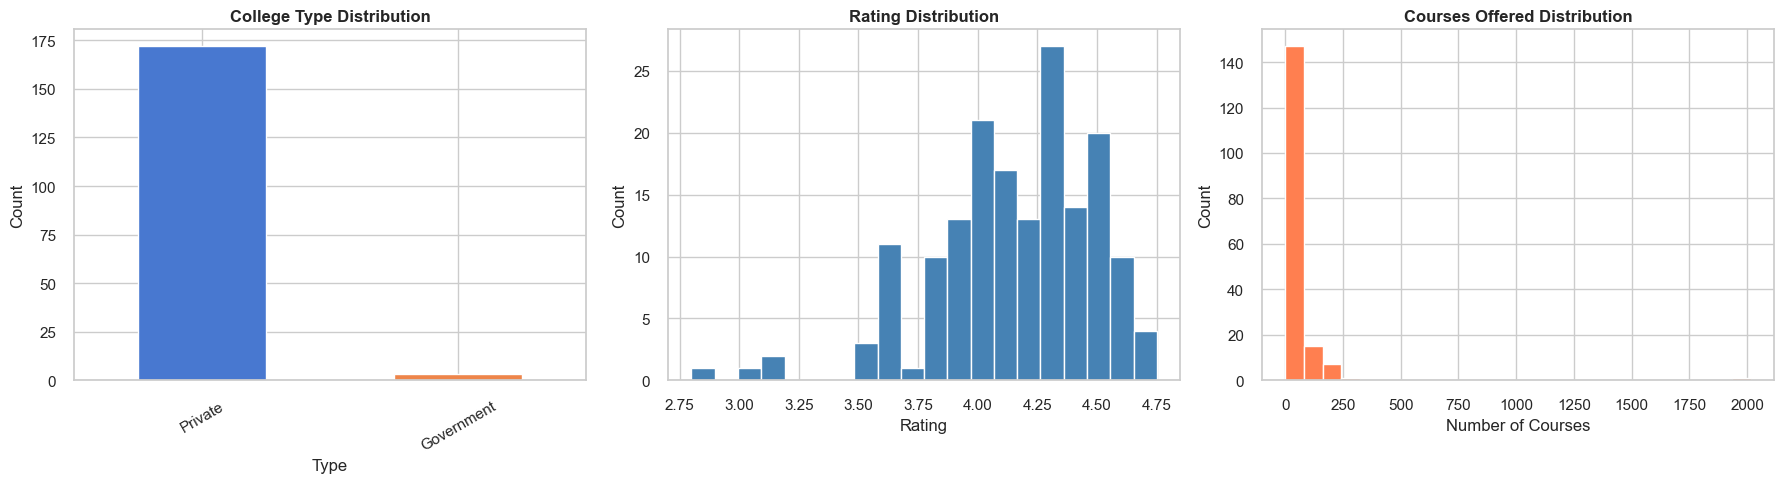

In [13]:
# ── College type distribution ─────────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# College type
colleges['college_type'].value_counts().plot(
    kind='bar', ax=axes[0], color=sns.color_palette('muted'), edgecolor='white')
axes[0].set_title('College Type Distribution', fontweight='bold')
axes[0].set_xlabel('Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

# Rating distribution
colleges['rating'].dropna().plot(
    kind='hist', bins=20, ax=axes[1], color='steelblue', edgecolor='white')
axes[1].set_title('Rating Distribution', fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')

# Courses offered distribution
colleges['courses_offered'].dropna().plot(
    kind='hist', bins=25, ax=axes[2], color='coral', edgecolor='white')
axes[2].set_title('Courses Offered Distribution', fontweight='bold')
axes[2].set_xlabel('Number of Courses')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

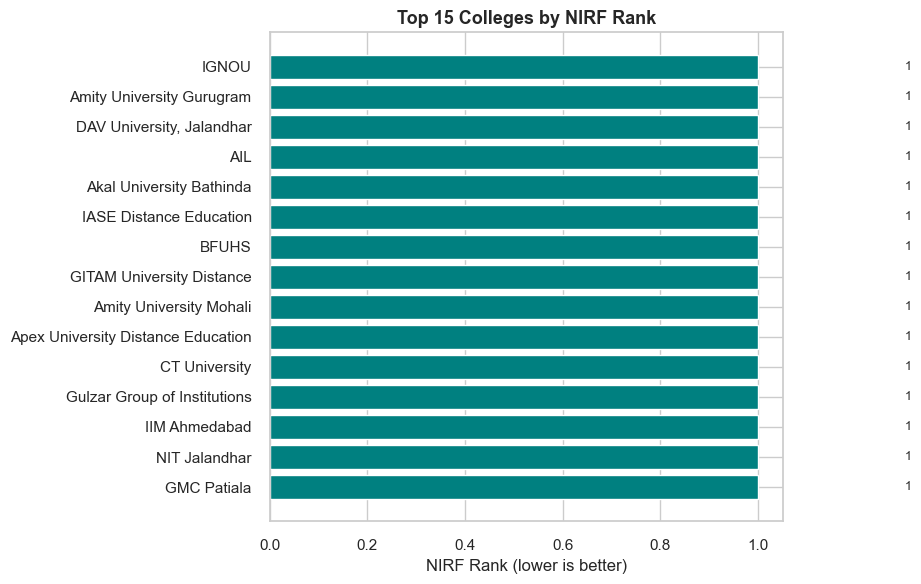

,name,nirf_rank,rating,college_type
1,IGNOU,1.0,4.0,Private
10,Amity University Gurugram,1.0,4.0,Private
20,"DAV University, Jalandhar",1.0,3.9,Private
40,AIL,1.0,3.8,Private
73,Akal University Bathinda,1.0,4.3,Private
77,IASE Distance Education,1.0,3.9,Private
80,BFUHS,1.0,4.0,Private
83,GITAM University Distance,1.0,3.1,Private
86,Amity University Mohali,1.0,4.3,Private
87,Apex University Distance Education,1.0,3.6,Private


In [14]:
# ── Top 15 colleges by NIRF rank (lower = better) ────────────────────────────
top_nirf = colleges.dropna(subset=['nirf_rank']).nsmallest(15, 'nirf_rank')[['name', 'nirf_rank', 'rating', 'college_type']]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_nirf['name'], top_nirf['nirf_rank'], color='teal', edgecolor='white')
ax.invert_yaxis()
ax.set_title('Top 15 Colleges by NIRF Rank', fontsize=13, fontweight='bold')
ax.set_xlabel('NIRF Rank (lower is better)')
for bar, val in zip(bars, top_nirf['nirf_rank']):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
            f'{int(val)}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

top_nirf

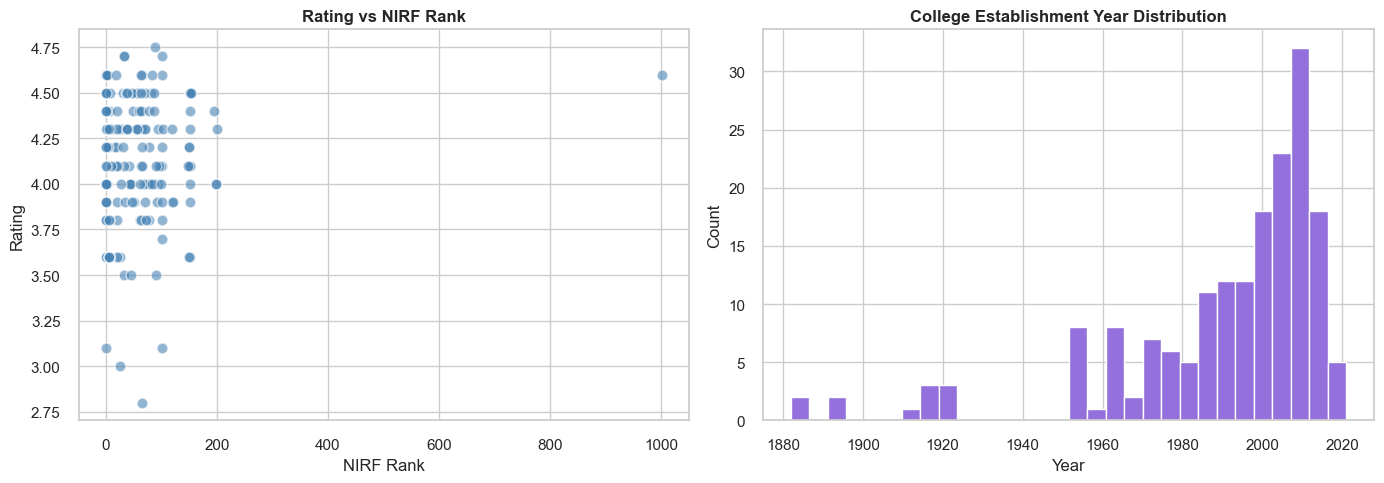

In [15]:
# ── Rating vs NIRF rank scatter ───────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter: rating vs nirf_rank
c_plot = colleges.dropna(subset=['nirf_rank', 'rating'])
axes[0].scatter(c_plot['nirf_rank'], c_plot['rating'], alpha=0.6, color='steelblue', edgecolors='white', s=60)
axes[0].set_title('Rating vs NIRF Rank', fontweight='bold')
axes[0].set_xlabel('NIRF Rank')
axes[0].set_ylabel('Rating')

# Established year distribution
colleges['established_year'].dropna().astype(int).plot(
    kind='hist', bins=30, ax=axes[1], color='mediumpurple', edgecolor='white')
axes[1].set_title('College Establishment Year Distribution', fontweight='bold')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

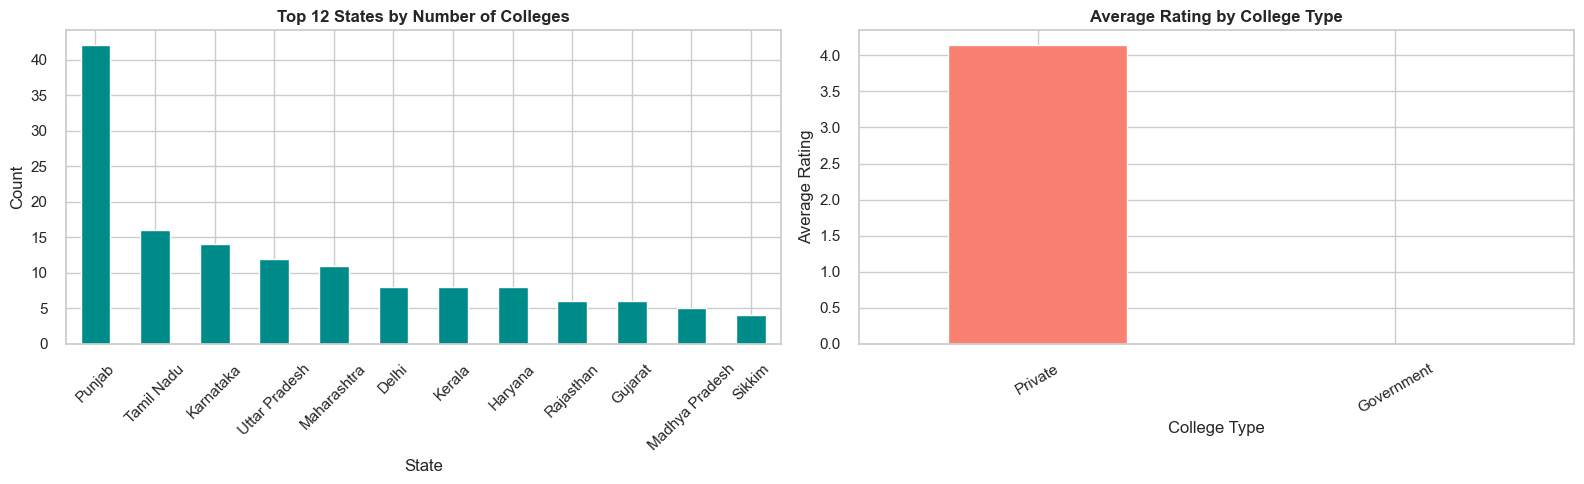

In [16]:
# ── Top locations by college count ───────────────────────────────────────────
# Extract city from location (format: "City, State")
colleges['city'] = colleges['location'].str.split(',').str[0].str.strip()
colleges['state'] = colleges['location'].str.split(',').str[1].str.strip()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

colleges['state'].value_counts().head(12).plot(
    kind='bar', ax=axes[0], color='darkcyan', edgecolor='white')
axes[0].set_title('Top 12 States by Number of Colleges', fontweight='bold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Average rating by college type
colleges.groupby('college_type')['rating'].mean().sort_values(ascending=False).plot(
    kind='bar', ax=axes[1], color='salmon', edgecolor='white')
axes[1].set_title('Average Rating by College Type', fontweight='bold')
axes[1].set_xlabel('College Type')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

## 2. Comparisons Table EDA

In [17]:
# ── Comparisons table overview ────────────────────────────────────────────────
print("Shape:", comparisons.shape)
print("\nMissing values:\n", comparisons.isnull().sum().to_string())
comparisons.head(3)

Shape: (12402, 20)

Missing values:
 id                       0
college_1                0
college_2                0
college_1_fees           0
college_2_fees           0
college_1_nirf         600
college_2_nirf        4901
college_1_courses        0
college_2_courses        0
college_1_year           0
college_2_year           0
college_1_students    2115
college_2_students    1809
college_1_type           0
college_2_type           0
college_1_rating       635
college_2_rating      5023
college_1_location    1133
college_2_location    6409
url                      0


,id,college_1,college_2,college_1_fees,college_2_fees,college_1_nirf,college_2_nirf,college_1_courses,college_2_courses,college_1_year,college_2_year,college_1_students,college_2_students,college_1_type,college_2_type,college_1_rating,college_2_rating,college_1_location,college_2_location,url
0,1,Periyar University Online,IGNOU,41,"1,000 - 64,000",56.0,1.0,6,285,1997,1985,65000.0,3093583.0,Private,Private,4.5,4.0,to make an informed decision using this compre...,"IGNOU New Delhi, Delhi",https://degreefyd.com/comparison/periyar-unive...
1,2,KJ Somaiya Online,Jammu University Distance Education,2,"7,335 - 21,285",63.0,50.0,7,13,1981,1976,NaN,11200.0,Private,Private,4.4,3.9,to make an informed decision using this compre...,None,https://degreefyd.com/comparison/k-j-somaiya-i...
2,3,Ganpat University Distance Learning,IIM Indore,2,"95,000 - 12,00,000",101.0,8.0,1,21,2005,1996,8500.0,NaN,Private,Private,4.1,4.4,to make an informed decision using this compre...,"IIM Indore Indore, Madhya Pradesh",https://degreefyd.com/comparison/ganpat-univer...


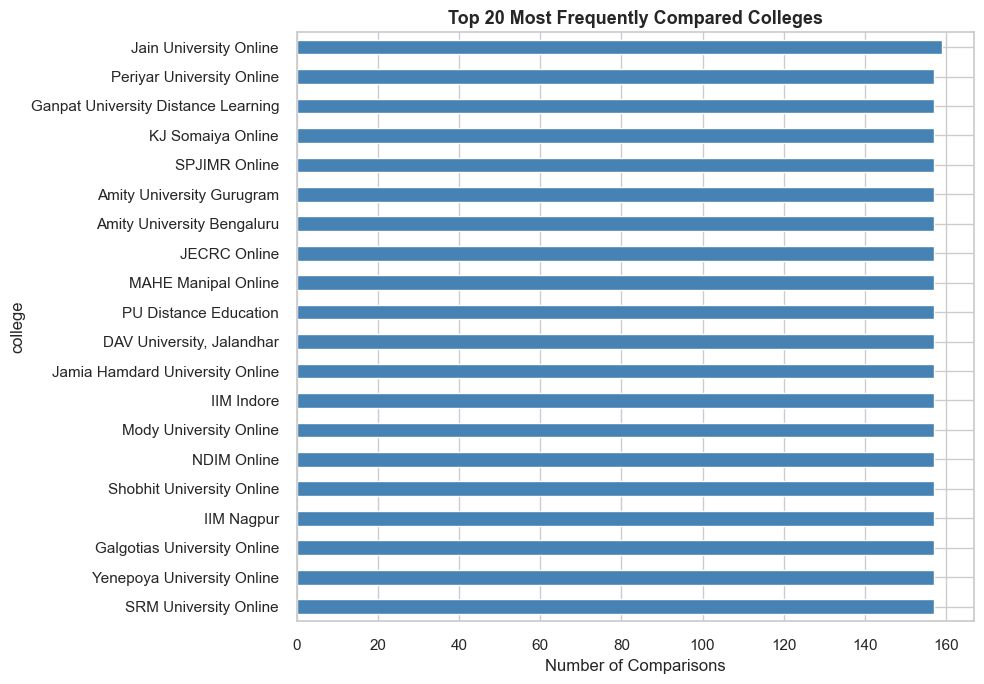

Top 10 most compared colleges:
college
Jain University Online                 159
Periyar University Online              157
Ganpat University Distance Learning    157
KJ Somaiya Online                      157
SPJIMR Online                          157
Amity University Gurugram              157
Amity University Bengaluru             157
JECRC Online                           157
MAHE Manipal Online                    157
PU Distance Education                  157


In [18]:
# ── Most frequently compared colleges ────────────────────────────────────────
all_colleges_in_comparisons = pd.concat([
    comparisons['college_1'].rename('college'),
    comparisons['college_2'].rename('college')
])
top_compared = all_colleges_in_comparisons.value_counts().head(20)

fig, ax = plt.subplots(figsize=(10, 7))
top_compared.plot(kind='barh', ax=ax, color='steelblue', edgecolor='white')
ax.invert_yaxis()
ax.set_title('Top 20 Most Frequently Compared Colleges', fontsize=13, fontweight='bold')
ax.set_xlabel('Number of Comparisons')
plt.tight_layout()
plt.show()

print("Top 10 most compared colleges:")
print(top_compared.head(10).to_string())

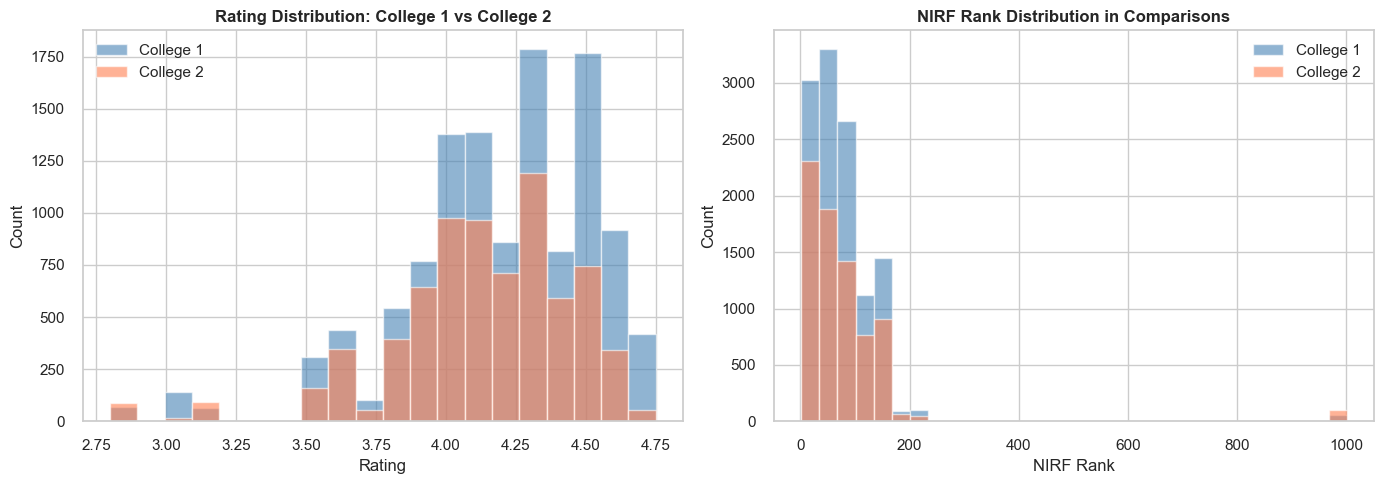

In [19]:
# ── Rating comparison: college_1 vs college_2 ────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of ratings for both sides
comparisons['college_1_rating'].dropna().plot(
    kind='hist', bins=20, ax=axes[0], alpha=0.6, color='steelblue', label='College 1', edgecolor='white')
comparisons['college_2_rating'].dropna().plot(
    kind='hist', bins=20, ax=axes[0], alpha=0.6, color='coral', label='College 2', edgecolor='white')
axes[0].set_title('Rating Distribution: College 1 vs College 2', fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
axes[0].legend()

# NIRF rank distribution
comparisons['college_1_nirf'].dropna().plot(
    kind='hist', bins=30, ax=axes[1], alpha=0.6, color='steelblue', label='College 1', edgecolor='white')
comparisons['college_2_nirf'].dropna().plot(
    kind='hist', bins=30, ax=axes[1], alpha=0.6, color='coral', label='College 2', edgecolor='white')
axes[1].set_title('NIRF Rank Distribution in Comparisons', fontweight='bold')
axes[1].set_xlabel('NIRF Rank')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

College 1 wins : 3,877
College 2 wins : 2,826
Ties           : 676
Total valid    : 7,379


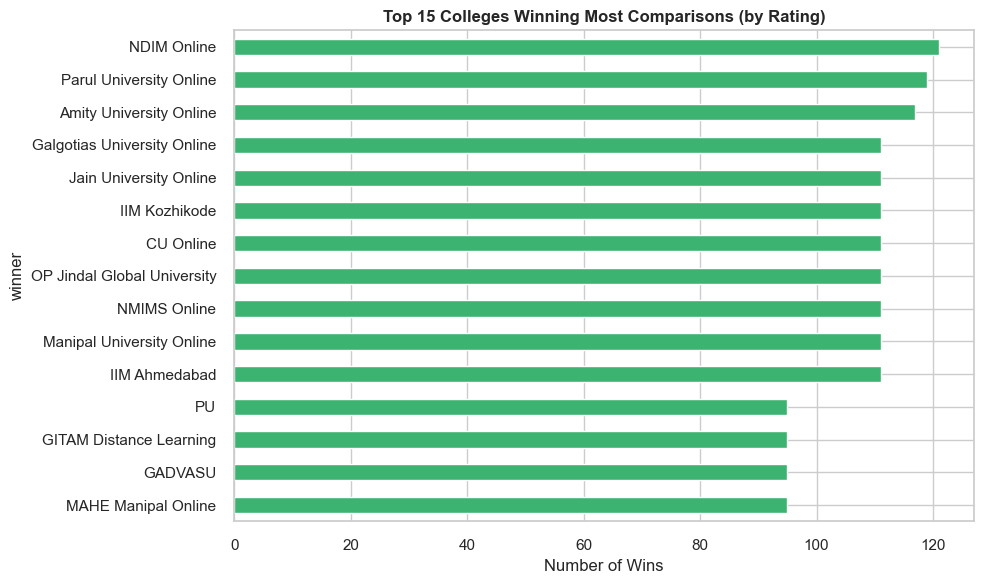

In [20]:
# ── Who wins more comparisons? (higher rating wins) ──────────────────────────
comp_valid = comparisons.dropna(subset=['college_1_rating', 'college_2_rating']).copy()
comp_valid['winner'] = comp_valid.apply(
    lambda r: r['college_1'] if r['college_1_rating'] > r['college_2_rating']
              else (r['college_2'] if r['college_2_rating'] > r['college_1_rating'] else 'Tie'),
    axis=1
)

winner_counts = comp_valid['winner'].value_counts()
tie_count = (comp_valid['winner'] == 'Tie').sum()
c1_wins = (comp_valid['college_1_rating'] > comp_valid['college_2_rating']).sum()
c2_wins = (comp_valid['college_2_rating'] > comp_valid['college_1_rating']).sum()

print(f"College 1 wins : {c1_wins:,}")
print(f"College 2 wins : {c2_wins:,}")
print(f"Ties           : {tie_count:,}")
print(f"Total valid    : {len(comp_valid):,}")

# Top 15 colleges that win the most comparisons
top_winners = winner_counts[winner_counts.index != 'Tie'].head(15)
fig, ax = plt.subplots(figsize=(10, 6))
top_winners.plot(kind='barh', ax=ax, color='mediumseagreen', edgecolor='white')
ax.invert_yaxis()
ax.set_title('Top 15 Colleges Winning Most Comparisons (by Rating)', fontsize=12, fontweight='bold')
ax.set_xlabel('Number of Wins')
plt.tight_layout()
plt.show()

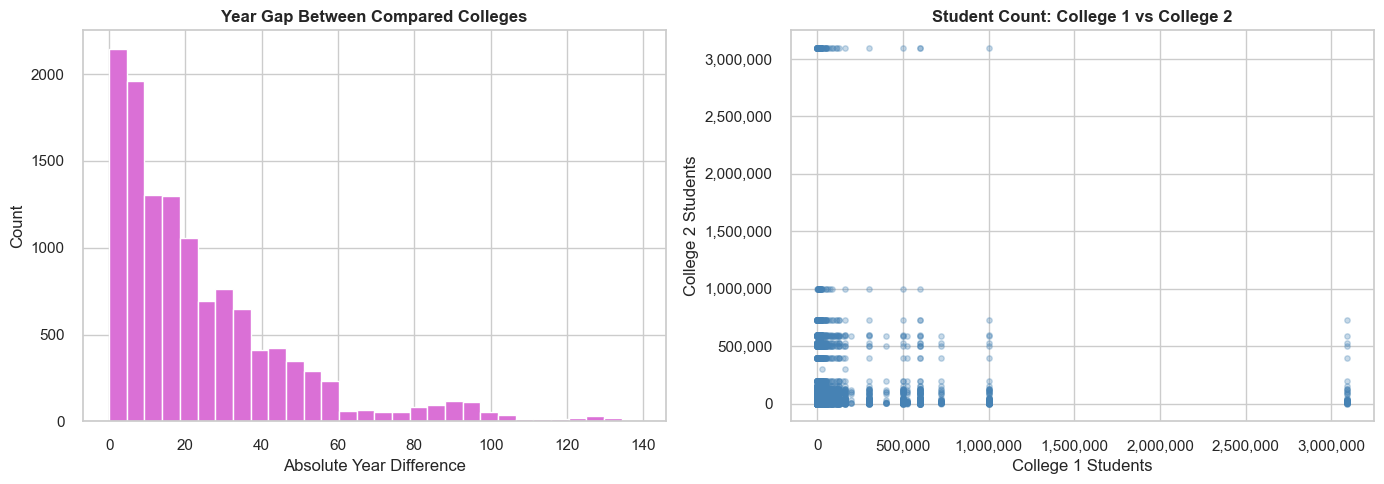

In [22]:
# ── Establishment year gap between compared colleges ─────────────────────────
comparisons['year_gap'] = (comparisons['college_1_year'] - comparisons['college_2_year']).abs()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

comparisons['year_gap'].dropna().plot(
    kind='hist', bins=30, ax=axes[0], color='orchid', edgecolor='white')
axes[0].set_title('Year Gap Between Compared Colleges', fontweight='bold')
axes[0].set_xlabel('Absolute Year Difference')
axes[0].set_ylabel('Count')


# Student count comparison
comp_students = comparisons.dropna(subset=['college_1_students', 'college_2_students'])
axes[1].scatter(comp_students['college_1_students'], comp_students['college_2_students'],
                alpha=0.3, s=15, color='steelblue')
axes[1].set_title('Student Count: College 1 vs College 2', fontweight='bold')
axes[1].set_xlabel('College 1 Students')
axes[1].set_ylabel('College 2 Students')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

## 3. Exams Table EDA

In [23]:
# ── Exams table overview ──────────────────────────────────────────────────────
print("Shape:", exams.shape)
print("\nMissing values:\n", exams.drop(columns='raw_content').isnull().sum().to_string())
exams.drop(columns='raw_content').head()

Shape: (141, 12)

Missing values:
 id                     0
name                   0
full_name            141
exam_date            106
application_start    141
application_end      141
result_date          141
conducting_body       99
exam_mode            141
duration             102
url                    0


,id,name,full_name,exam_date,application_start,application_end,result_date,conducting_body,exam_mode,duration,url
0,1,CLAT,None,07 December 2025,None,None,None,Consortium of National Law Universities CLAT E...,None,2 hours,https://degreefyd.com/exams/clat-exam-date
1,2,CLAT,None,None,None,None,None,None,None,None,https://degreefyd.com/exams/clat-exam-question...
2,3,IBSAT,None,None,None,None,None,None,None,None,https://degreefyd.com/exams/ibsat-exam-result
3,4,UCEED,None,None,None,None,None,None,None,None,https://degreefyd.com/exams/uceed-exam-admit-card
4,5,NMAT,None,None,None,None,None,None,None,None,https://degreefyd.com/exams/nmat-exam-admit-card


IndexError: index 0 is out of bounds for axis 0 with size 0

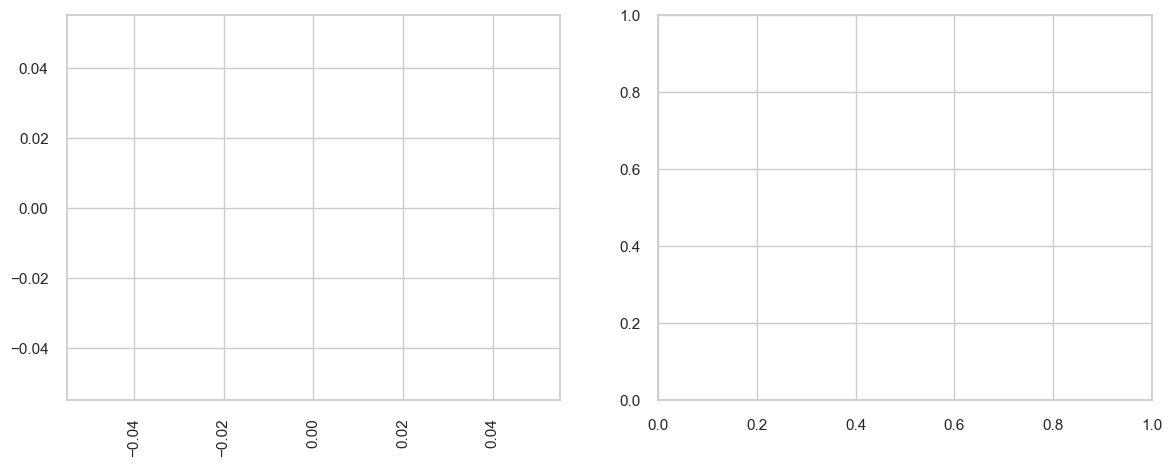

In [24]:
# ── Exam mode distribution ────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

exams['exam_mode'].value_counts().plot(
    kind='bar', ax=axes[0], color=sns.color_palette('Set2'), edgecolor='white')
axes[0].set_title('Exam Mode Distribution', fontweight='bold')
axes[0].set_xlabel('Mode')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

# Conducting body top 10
exams['conducting_body'].value_counts().head(10).plot(
    kind='barh', ax=axes[1], color='cadetblue', edgecolor='white')
axes[1].invert_yaxis()
axes[1].set_title('Top 10 Conducting Bodies', fontweight='bold')
axes[1].set_xlabel('Number of Exams')

plt.tight_layout()
plt.show()

In [25]:
# ── Exam duration distribution ────────────────────────────────────────────────
# Parse duration to numeric minutes where possible
def parse_duration(d):
    if pd.isna(d):
        return None
    d = str(d).lower().strip()
    import re
    m = re.search(r'(\d+\.?\d*)\s*hour', d)
    if m:
        return float(m.group(1)) * 60
    m = re.search(r'(\d+\.?\d*)\s*min', d)
    if m:
        return float(m.group(1))
    m = re.search(r'^(\d+\.?\d*)$', d)
    if m:
        return float(m.group(1))
    return None

exams['duration_min'] = exams['duration'].apply(parse_duration)

print("Duration value counts (raw):")
print(exams['duration'].value_counts().head(15).to_string())
print(f"\nParsed duration (minutes) — {exams['duration_min'].notna().sum()} exams:")
print(exams['duration_min'].describe().round(1).to_string())

Duration value counts (raw):
duration
3 Hours               15
3 hours                9
2 hours                7
2 Hours                4
6 hours                1
2 hours 30 minutes     1
3 hours 30 minutes     1
3 hours 10 minutes     1

Parsed duration (minutes) — 39 exams:
count     39.0
mean     166.2
std       42.3
min      120.0
25%      120.0
50%      180.0
75%      180.0
max      360.0


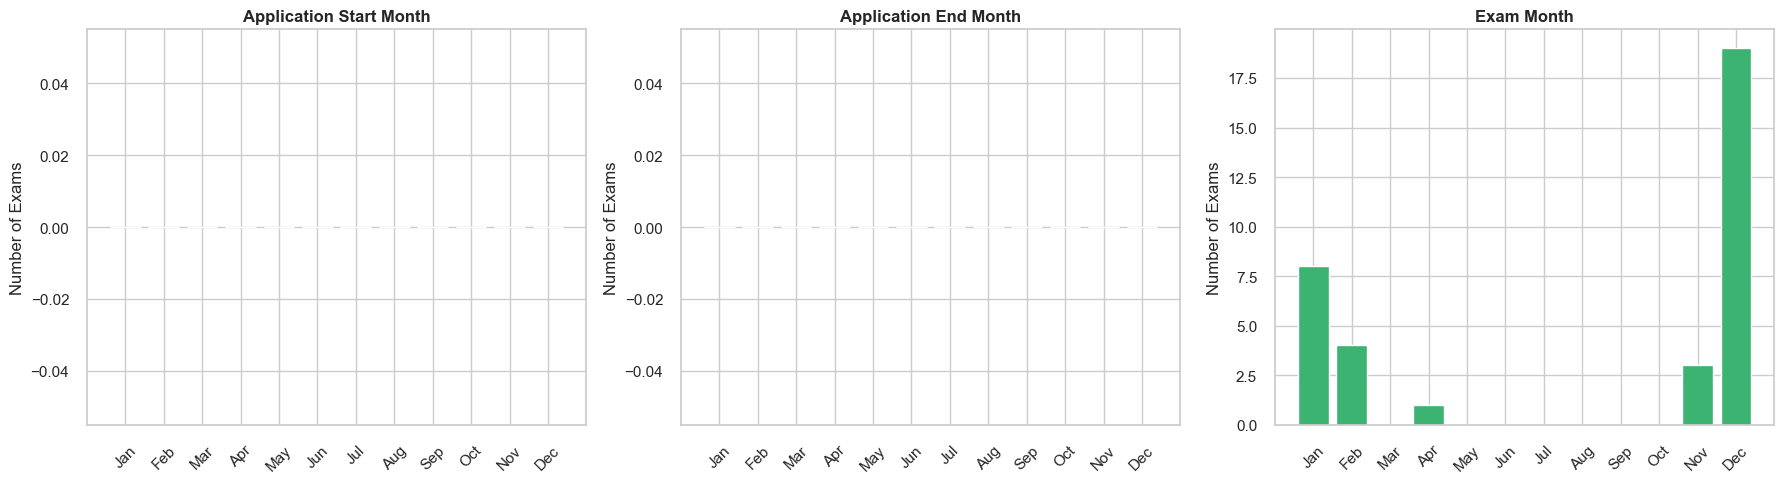

In [26]:
# ── Exam timeline: application windows ───────────────────────────────────────
import re

def extract_month(date_str):
    if pd.isna(date_str):
        return None
    months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    d = str(date_str).lower()
    for i, m in enumerate(months, 1):
        if m in d:
            return i
    return None

exams['app_start_month'] = exams['application_start'].apply(extract_month)
exams['app_end_month']   = exams['application_end'].apply(extract_month)
exams['exam_month']      = exams['exam_date'].apply(extract_month)

month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, title, color in [
    (axes[0], 'app_start_month', 'Application Start Month', 'steelblue'),
    (axes[1], 'app_end_month',   'Application End Month',   'coral'),
    (axes[2], 'exam_month',      'Exam Month',              'mediumseagreen'),
]:
    counts = exams[col].value_counts().reindex(range(1, 13), fill_value=0)
    ax.bar(range(1, 13), counts.values, color=color, edgecolor='white')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_labels, rotation=45)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('Number of Exams')

plt.tight_layout()
plt.show()

## 4. Blogs Table EDA

In [27]:
# ── Blogs table overview ──────────────────────────────────────────────────────
print("Shape:", blogs.shape)
print("\nMissing values:\n", blogs.drop(columns='content').isnull().sum().to_string())
blogs.drop(columns='content').head()

Shape: (161, 7)

Missing values:
 id                    0
title                 0
author                1
date                  1
college_mentioned    25
url                   0


,id,title,author,date,college_mentioned,url
0,1,Best NMIMS Online MBA Specializations in 2025,yogita,5 Nov 2025,NMIMS Online MBA Specializations in,https://degreefyd.com/blogs/nmims-online-mba-s...
1,2,Distance Learning vs. Regular College: What Em...,Singh,11 Oct 2025,Manipal University,https://degreefyd.com/blogs/distance-learning-...
2,3,Succeed in Jain University Online MBA with Exp...,BaliJeet,6 Sept 2025,Manipal University Worth It,https://degreefyd.com/blogs/succeed-online-mba...
3,4,Best Online Degrees for Night Shift Workers 2026,yogita,6 Dec 2025,Amity University Online Recorded classes,https://degreefyd.com/blogs/online-degree-for-...
4,5,Top Career Options After 12th [2025] for Scien...,Singh,29 Sept 2025,None,https://degreefyd.com/blogs/career-options-aft...


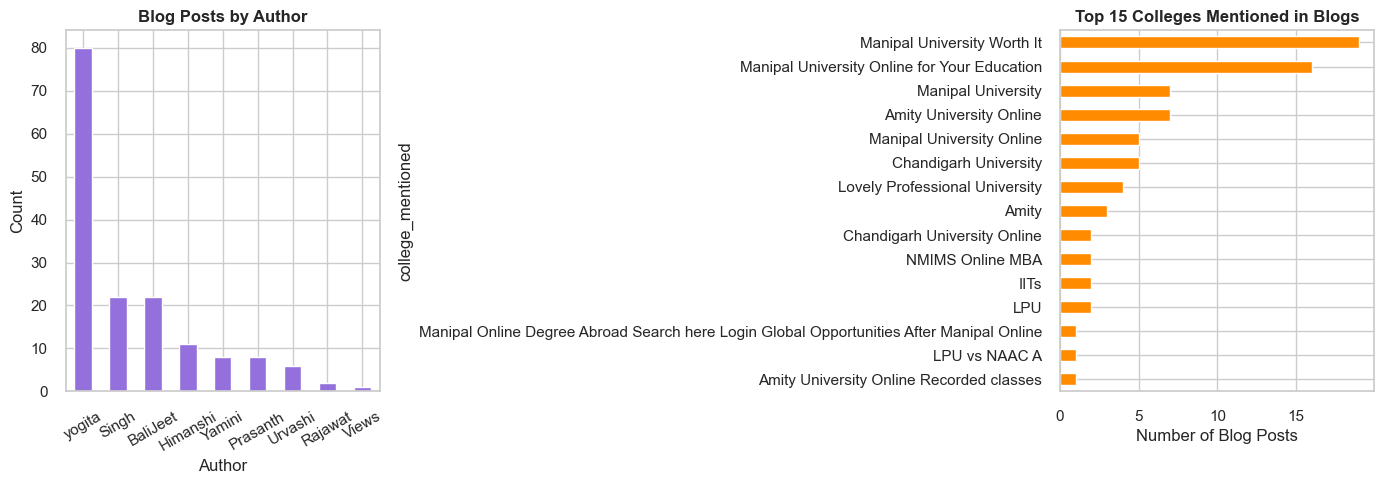

In [28]:
# ── Blog posts by author ──────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

blogs['author'].value_counts().dropna().plot(
    kind='bar', ax=axes[0], color='mediumpurple', edgecolor='white')
axes[0].set_title('Blog Posts by Author', fontweight='bold')
axes[0].set_xlabel('Author')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

# College mentioned frequency
blogs['college_mentioned'].value_counts().dropna().head(15).plot(
    kind='barh', ax=axes[1], color='darkorange', edgecolor='white')
axes[1].invert_yaxis()
axes[1].set_title('Top 15 Colleges Mentioned in Blogs', fontweight='bold')
axes[1].set_xlabel('Number of Blog Posts')

plt.tight_layout()
plt.show()

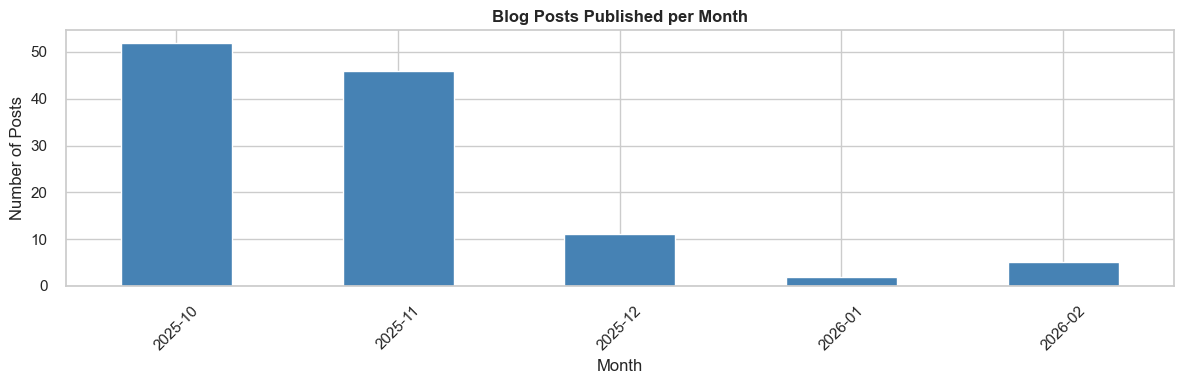

Date range: 2025-10-03 00:00:00 → 2026-02-06 00:00:00


In [29]:
# ── Blog publishing timeline ──────────────────────────────────────────────────
blogs['date_parsed'] = pd.to_datetime(blogs['date'], format='%d %b %Y', errors='coerce')
blogs['pub_month'] = blogs['date_parsed'].dt.to_period('M')

monthly_posts = blogs.groupby('pub_month').size().sort_index()

fig, ax = plt.subplots(figsize=(12, 4))
monthly_posts.plot(kind='bar', ax=ax, color='steelblue', edgecolor='white')
ax.set_title('Blog Posts Published per Month', fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Posts')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

print("Date range:", blogs['date_parsed'].min(), "→", blogs['date_parsed'].max())

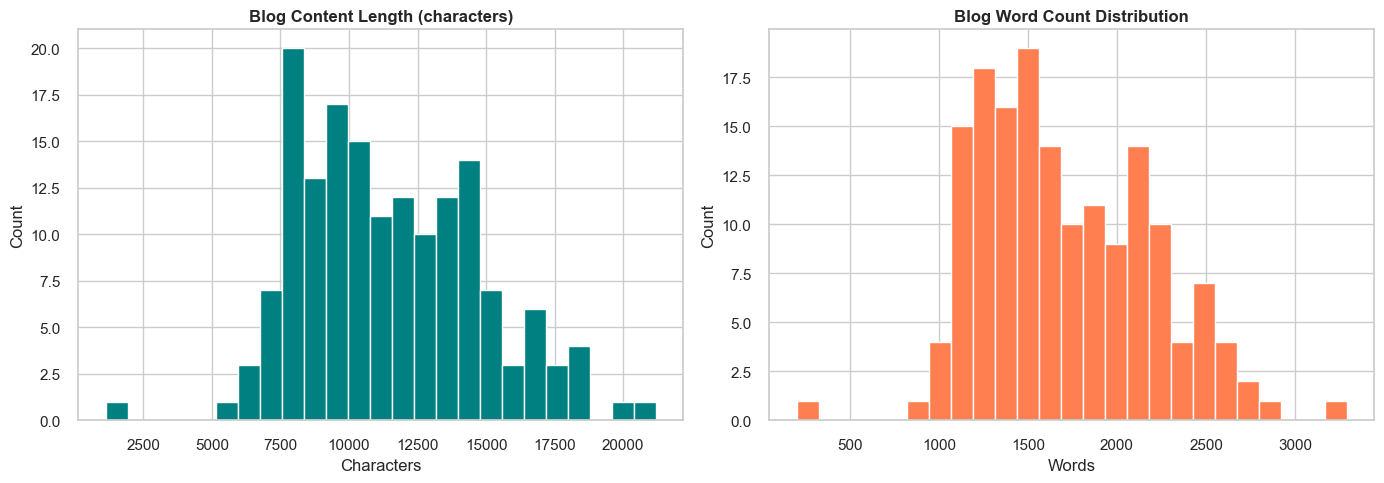

       content_length  word_count
count           161.0       161.0
mean          11459.5      1710.0
std            3273.8       481.7
min            1138.0       203.0
25%            8982.0      1314.0
50%           10914.0      1620.0
75%           13914.0      2074.0
max           21178.0      3289.0


In [30]:
# ── Blog content length analysis ─────────────────────────────────────────────
blogs['content_length'] = blogs['content'].str.len()
blogs['word_count']     = blogs['content'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

blogs['content_length'].plot(kind='hist', bins=25, ax=axes[0], color='teal', edgecolor='white')
axes[0].set_title('Blog Content Length (characters)', fontweight='bold')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Count')

blogs['word_count'].plot(kind='hist', bins=25, ax=axes[1], color='coral', edgecolor='white')
axes[1].set_title('Blog Word Count Distribution', fontweight='bold')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(blogs[['content_length', 'word_count']].describe().round(1).to_string())

## 5. Cross-Table Analysis

Colleges in `colleges` table          : 308
Unique colleges in `comparisons` table : 160
Overlap (in both)                      : 160
Only in colleges table                 : 148
Only in comparisons table              : 0


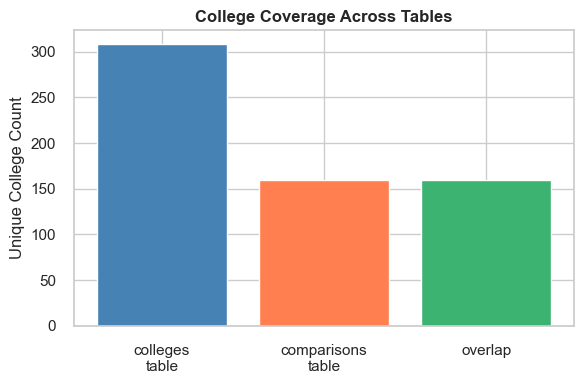

In [31]:
# ── Colleges in DB vs colleges in comparisons ────────────────────────────────
db_college_names = set(colleges['name'].str.strip().str.lower())
comp_college_names = set(
    pd.concat([comparisons['college_1'], comparisons['college_2']])
    .str.strip().str.lower().dropna()
)

in_both   = db_college_names & comp_college_names
only_db   = db_college_names - comp_college_names
only_comp = comp_college_names - db_college_names

print(f"Colleges in `colleges` table          : {len(db_college_names)}")
print(f"Unique colleges in `comparisons` table : {len(comp_college_names)}")
print(f"Overlap (in both)                      : {len(in_both)}")
print(f"Only in colleges table                 : {len(only_db)}")
print(f"Only in comparisons table              : {len(only_comp)}")

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['colleges\ntable', 'comparisons\ntable', 'overlap'],
       [len(db_college_names), len(comp_college_names), len(in_both)],
       color=['steelblue', 'coral', 'mediumseagreen'], edgecolor='white')
ax.set_title('College Coverage Across Tables', fontweight='bold')
ax.set_ylabel('Unique College Count')
plt.tight_layout()
plt.show()

Colleges matched between tables: 160


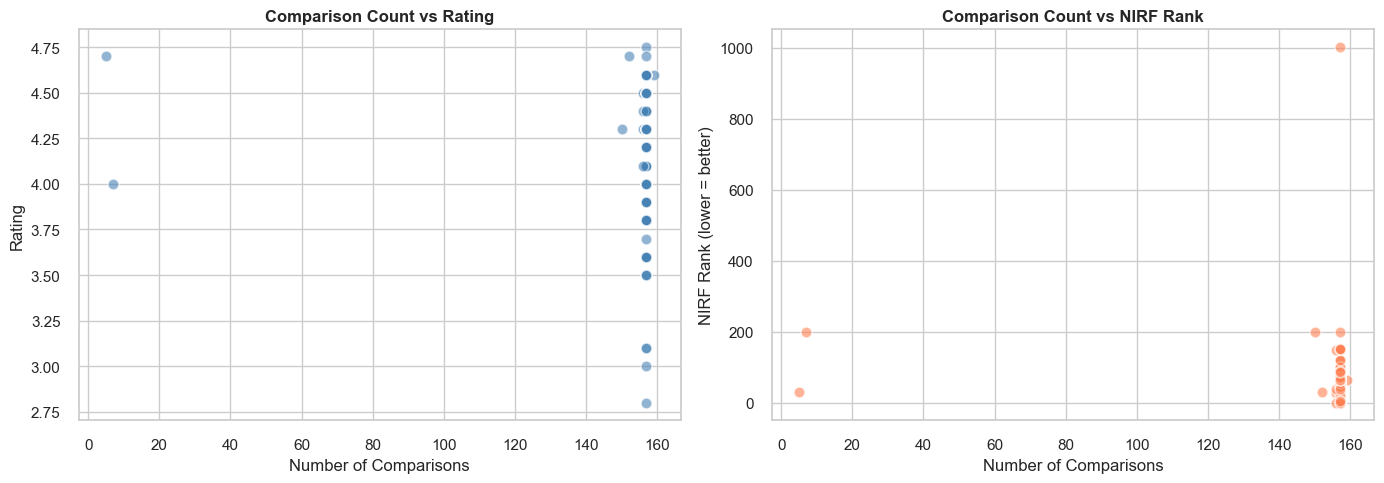

In [32]:
# ── Colleges with most comparisons (from comparisons table joined to colleges) ─
comp_freq = all_colleges_in_comparisons.value_counts().reset_index()
comp_freq.columns = ['name', 'comparison_count']

merged = colleges.merge(comp_freq, on='name', how='inner')
print(f"Colleges matched between tables: {len(merged)}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# comparison count vs rating
axes[0].scatter(merged['comparison_count'], merged['rating'],
                alpha=0.6, color='steelblue', edgecolors='white', s=60)
axes[0].set_title('Comparison Count vs Rating', fontweight='bold')
axes[0].set_xlabel('Number of Comparisons')
axes[0].set_ylabel('Rating')

# comparison count vs nirf rank
c_nirf = merged.dropna(subset=['nirf_rank'])
axes[1].scatter(c_nirf['comparison_count'], c_nirf['nirf_rank'],
                alpha=0.6, color='coral', edgecolors='white', s=60)
axes[1].set_title('Comparison Count vs NIRF Rank', fontweight='bold')
axes[1].set_xlabel('Number of Comparisons')
axes[1].set_ylabel('NIRF Rank (lower = better)')

plt.tight_layout()
plt.show()

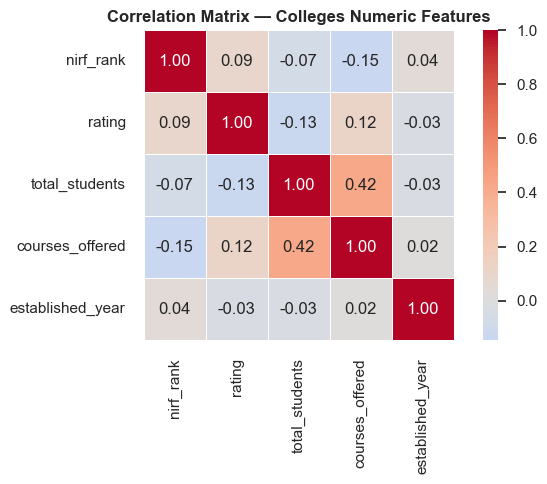

In [33]:
# ── Correlation heatmap for colleges numeric features ─────────────────────────
num_cols = ['nirf_rank', 'rating', 'total_students', 'courses_offered', 'established_year']
corr = colleges[num_cols].corr()

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, ax=ax, square=True)
ax.set_title('Correlation Matrix — Colleges Numeric Features', fontweight='bold')
plt.tight_layout()
plt.show()

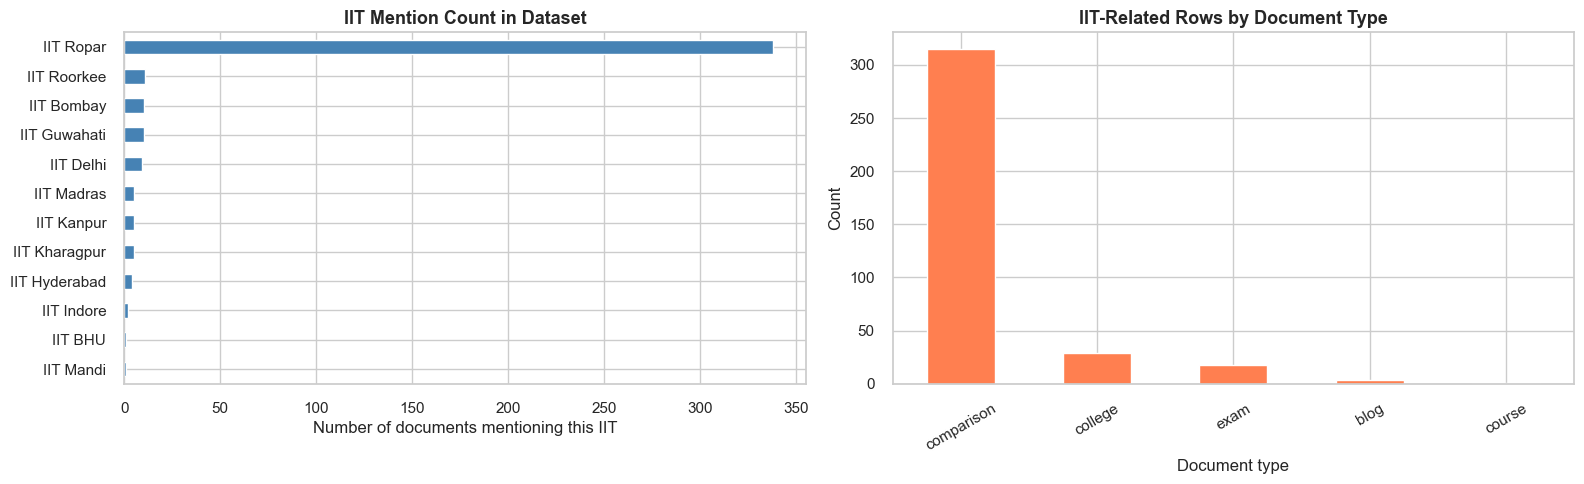

In [35]:

# ── Bar chart: IIT mentions by institution ───────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Left: mention counts
iit_series.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('IIT Mention Count in Dataset', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Number of documents mentioning this IIT')
axes[0].invert_yaxis()

# Right: IIT rows by doc type
iit_df['type'].value_counts().plot(kind='bar', ax=axes[1], color='coral', edgecolor='white')
axes[1].set_title('IIT-Related Rows by Document Type', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Document type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()
